In [21]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

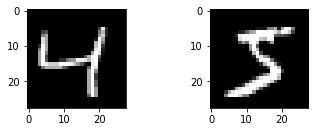

In [23]:
plt.subplot(221)
plt.imshow(X_train[2],cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[0],cmap = plt.get_cmap('gray'))
plt.show()

In [24]:
#flattening from 28x28 to 284 vector
img_rows = 28
img_cols = 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [25]:
# normalize 0-255 values to 0-1 values
X_train /= 255
X_test /= 255

In [26]:
#view training data
print('X_train shape = ', X_train.shape)

X_train shape =  (60000, 28, 28, 1)


In [27]:
# 10 digits
import keras 
import tensorflow as tf
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [28]:
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

# Model: Sequential
# Convolutional layer
# Convolutional Layer
# Pooling layer
# Dropout layer
# Flatten layer
# Dense layer
# Dropout layyer
# Dense layer (10 neurson using the softmax activation function)

In [29]:
batch_size = 128
epochs = 12

model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)

print('Test Accuracy: ', score[1])
print('Test Loss: ', score[0])

model.save('mnist.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2675 - accuracy: 0.9185 - val_loss: 0.0627 - val_accuracy: 0.9790
Epoch 2/12
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0908 - accuracy: 0.9731 - val_loss: 0.0392 - val_accuracy: 0.9871
Epoch 3/12
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0662 - accuracy: 0.9807 - val_loss: 0.0340 - val_accuracy: 0.9888
Epoch 4/12
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0543 - accuracy: 0.9837 - val_loss: 0.0299 - val_accuracy: 0.9895
Epoch 5/12
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0274 - val_accuracy: 0.9910
Epoch 6/12
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0285 - val_accuracy: 0.9909
Epoch 7/12
60000/60000 [==============================] - 91s 2ms/s

In [41]:
from keras.models import load_model

def prep_image(image_file_name):
    x = imread(image_file_name, pilmode = 'L')
    x = np.invert(x)
    x = tf.image.resize(x, (28,28))
    x = x.reshape(1, 28, 28, 1)
    x = x.astype('float32')
    x /= 255
    return x
def predict_image(image_file_name):
    x = prep_image(image_file_name)
    model = load_model('mnist.h5')
    result = model.predict(x)
    return result

In [43]:
#from skimage.io import imread
#import numpy as np
#image_name = 'mnistTest.jpg'
#result = predict_image(image_name)
#print(result)

In [ ]:
#predicted_value = np.argmax(result)
#print(predicted_value)